In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('train_test.csv')
df

,loan_amnt,term,int_rate,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,mort_acc,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,0.078481,0.0,0.338138,0.005000,0.159217,0.0,0.000952,29.7,13.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.612658,0.0,0.260226,0.005910,0.393088,0.0,0.007391,19.2,38.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,0.493671,1.0,0.213089,0.005728,0.271429,0.0,0.002709,56.2,18.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,0.250633,1.0,0.667705,0.009495,0.607834,0.0,0.007549,64.5,35.0,6.0,...,1,0,0,0,0,0,0,0,0,0
4,0.289873,0.0,0.316712,0.003091,0.258065,0.0,0.003037,68.4,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339813,0.443038,1.0,0.162836,0.011819,0.497696,0.0,0.008205,34.0,39.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1339814,0.731646,1.0,0.338138,0.016437,0.530645,0.0,0.026673,85.2,32.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1339815,0.797468,1.0,0.357616,0.014274,0.261290,0.0,0.038418,27.4,18.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1339816,0.392405,1.0,0.291391,0.013637,0.305300,4.0,0.002651,55.0,28.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop(['y'], axis=1)
y = df['y']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state = 99)

In [5]:
X_train.shape

(937872, 114)

In [6]:
y_train.shape

(937872,)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [15]:
## Logistics

In [42]:
clf_model = LogisticRegression()
clf_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
clf_model.coef_[0]

array([ 2.62835572e-01,  5.02496554e-01,  1.27570175e+00, -2.28832111e-02,
        8.89079733e-01, -1.49951492e-02, -9.97654836e-03, -2.98494839e-03,
       -2.26291626e-03, -5.89659114e-02, -1.46374980e+00, -3.21561921e-02,
       -2.30837481e-01, -2.16645758e-01, -3.06277279e-03, -2.40821451e-01,
       -5.99247154e-02, -1.99184445e-01, -4.93623548e-02, -6.11602826e-02,
       -2.59854415e-01,  1.44537513e-03,  9.72275965e-02, -5.78104745e-02,
       -6.31599652e-02,  8.16072321e-02,  8.38184606e-02, -5.01361656e-02,
       -6.49659772e-02, -2.60878875e-01, -1.23003942e-01, -6.29798448e-02,
       -7.72885267e-03,  4.83276878e-02, -1.53022153e-01, -4.07441586e-02,
       -6.60955380e-05, -4.76088772e-03, -1.28031196e-01,  2.27995393e-02,
       -8.33924970e-02,  8.90762293e-03,  6.24887529e-02, -7.28223069e-02,
        2.02330946e-02, -2.69278091e-02, -2.24433584e-02, -2.73275786e-02,
        4.66502943e-02,  7.06414305e-02, -3.30582959e-02, -1.78347149e-02,
       -2.54428208e-03,  

Accuracy (train): 0.803
Precision (train): 0.548
Recall (train): 0.055
ROC_AUC (train): 0.708 


Text(80.90000000000006, 0.5, 'True')

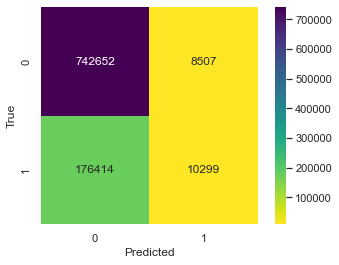

In [12]:
clf_predict_train = clf_model.predict(X_train)
acc_test = accuracy_score(y_train, clf_predict_train)
prec_test = precision_score(y_train, clf_predict_train)
rec_test = recall_score(y_train, clf_predict_train)
roc_auc_test = roc_auc_score(y_train, clf_model.predict_proba(X_train)[:, 1])
print(f'''Accuracy (train): {acc_test:.3f}
Precision (train): {prec_test:.3f}
Recall (train): {rec_test:.3f}
ROC_AUC (train): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_train, clf_predict_train)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

Accuracy (test): 0.803
Precision (test): 0.553
Recall (test): 0.056
ROC_AUC (test): 0.708 


Text(80.90000000000006, 0.5, 'True')

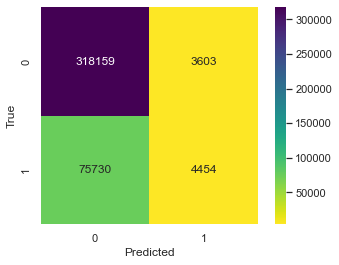

In [13]:
clf_predict = clf_model.predict(X_validation)
acc_test = accuracy_score(y_validation, clf_predict)
prec_test = precision_score(y_validation, clf_predict)
rec_test = recall_score(y_validation, clf_predict)
roc_auc_test = roc_auc_score(y_validation, clf_model.predict_proba(X_validation)[:, 1])
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}
ROC_AUC (test): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_validation, clf_predict)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

In [14]:
num_folds = 10
seed = 99

#kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
#clf_model = LogisticRegression()
#results_1  = cross_val_score(clf_model, X_train, y_train, cv=kfold, scoring= 'roc_auc')

#print(results_1.mean())
#print(results_1.std())

accuracy on fold0 71.00382885991982
accuracy on fold1 70.97637024646988
accuracy on fold2 70.66878466821164
accuracy on fold3 70.45182825468264
accuracy on fold4 70.94745384395803
accuracy on fold5 70.2293552884899
accuracy on fold6 70.53984224235283
accuracy on fold7 70.59515107248457
accuracy on fold8 71.00601940848945
accuracy on fold9 70.6182939508289
0.7070369278358876
0.002551131407829291


## Decision Tree

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy (train): 1.000
Precision (train): 1.000
Recall (train): 1.000
ROC_AUC (train): 1.000 


Text(80.90000000000006, 0.5, 'True')

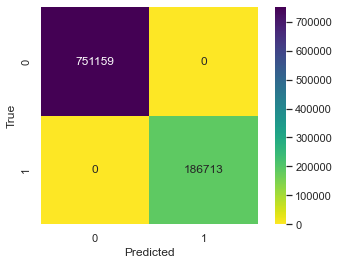

In [17]:
dt_predict_train = dt_model.predict(X_train)
acc_test = accuracy_score(y_train, dt_predict_train)
prec_test = precision_score(y_train, dt_predict_train)
rec_test = recall_score(y_train, dt_predict_train)
roc_auc_test = roc_auc_score(y_train, dt_model.predict_proba(X_train)[:, 1])
print(f'''Accuracy (train): {acc_test:.3f}
Precision (train): {prec_test:.3f}
Recall (train): {rec_test:.3f}
ROC_AUC (train): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_train, dt_predict_train)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

Accuracy (test): 0.706
Precision (test): 0.276
Recall (test): 0.291
ROC_AUC (test): 0.550 


Text(80.90000000000006, 0.5, 'True')

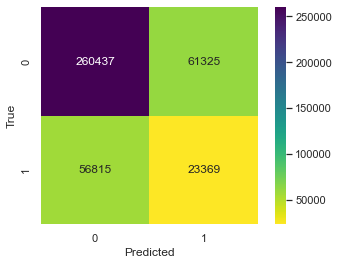

In [20]:
dt_predict = dt_model.predict(X_validation)
acc_test = accuracy_score(y_validation, dt_predict)
prec_test = precision_score(y_validation, dt_predict)
rec_test = recall_score(y_validation, dt_predict)
roc_auc_test = roc_auc_score(y_validation, dt_model.predict_proba(X_validation)[:, 1])
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}
ROC_AUC (test): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_validation, dt_predict)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

In [21]:
#kfold = KFold(n_splits= num_folds, random_state=seed, shuffle=True)
#results_2 = cross_val_score(dt_model, X_train, y_train, cv = kfold, scoring= 'roc_auc')

#print(results_2.mean())
#print(results_2.std())

0.5499439664703861
0.0025626229034223947


In [25]:
## Random forest

In [22]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

Accuracy (train): 1.000
Precision (train): 1.000
Recall (train): 1.000
ROC_AUC (train): 1.000 


Text(80.90000000000006, 0.5, 'True')

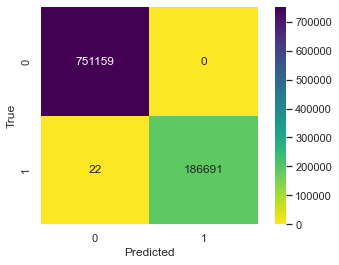

In [46]:
rf_predict_train = rf_model.predict(X_train)

acc_test = accuracy_score(y_train, rf_predict_train)
prec_test = precision_score(y_train, rf_predict_train)
rec_test = recall_score(y_train, rf_predict_train)
roc_auc_test = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])

print(f'''Accuracy (train): {acc_test:.3f}
Precision (train): {prec_test:.3f}
Recall (train): {rec_test:.3f}
ROC_AUC (train): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_train, rf_predict_train)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

Accuracy (test): 0.803
Precision (test): 0.551
Recall (test): 0.070
ROC_AUC (test): 0.706 


Text(80.90000000000006, 0.5, 'True')

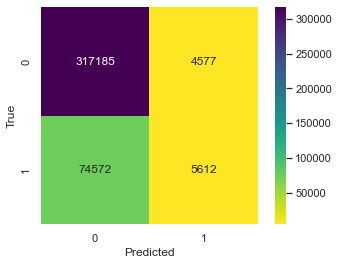

In [24]:
rf_predict = rf_model.predict(X_validation)

acc_test = accuracy_score(y_validation, rf_predict)
prec_test = precision_score(y_validation, rf_predict)
rec_test = recall_score(y_validation, rf_predict)
roc_auc_test = roc_auc_score(y_validation, rf_model.predict_proba(X_validation)[:, 1])

print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}
ROC_AUC (test): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_validation, rf_predict)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

In [28]:
#kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
#results_3  = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring= 'roc_auc')

#print(results_3.mean())
#print(results_3.std())

0.8032130175036502
0.0011390354024095044


In [29]:
## XGBoost

In [25]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy (train): 0.808
Precision (train): 0.616
Recall (train): 0.096
ROC_AUC (train): 0.741 


Text(80.90000000000006, 0.5, 'True')

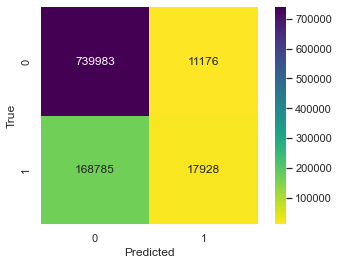

In [35]:
xg_predict_train = xg_model.predict(X_train)

acc_test = accuracy_score(y_train, xg_predict_train)
prec_test = precision_score(y_train, xg_predict_train)
rec_test = recall_score(y_train, xg_predict_train)
roc_auc_test = roc_auc_score(y_train, xg_model.predict_proba(X_train)[:, 1])
print(f'''Accuracy (train): {acc_test:.3f}
Precision (train): {prec_test:.3f}
Recall (train): {rec_test:.3f}
ROC_AUC (train): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_train, xg_predict_train)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

Accuracy (test): 0.805
Precision (test): 0.565
Recall (test): 0.088
ROC_AUC (test): 0.722 


Text(80.90000000000006, 0.5, 'True')

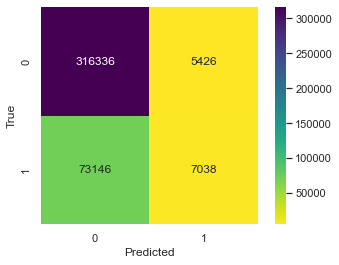

In [27]:
xg_predict = xg_model.predict(X_validation)

acc_test = accuracy_score(y_validation, xg_predict)
prec_test = precision_score(y_validation, xg_predict)
rec_test = recall_score(y_validation, xg_predict)
roc_auc_test = roc_auc_score(y_validation, xg_model.predict_proba(X_validation)[:, 1])

print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}
ROC_AUC (test): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_validation, xg_predict)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

In [32]:
#kfold = KFold(n_splits= num_folds, random_state=seed, shuffle=True)
#results_4 = cross_val_score(xg_model, X_train, y_train, cv = kfold, scoring= 'roc_auc')

#print(results_4.mean())
#print(results_4.std())

0.8044765167272141
0.0013301631276156779


In [33]:
## CatBoost

In [11]:
cb_model = CatBoostClassifier()
cb_model.fit(X_train, y_train)

Learning rate set to 0.191443
0:	learn: 0.6028430	total: 250ms	remaining: 4m 9s
1:	learn: 0.5474793	total: 369ms	remaining: 3m 4s
2:	learn: 0.5135525	total: 606ms	remaining: 3m 21s
3:	learn: 0.4932970	total: 806ms	remaining: 3m 20s
4:	learn: 0.4802788	total: 967ms	remaining: 3m 12s
5:	learn: 0.4722658	total: 1.2s	remaining: 3m 18s
6:	learn: 0.4669207	total: 1.34s	remaining: 3m 10s
7:	learn: 0.4632377	total: 1.48s	remaining: 3m 4s
8:	learn: 0.4603716	total: 1.59s	remaining: 2m 55s
9:	learn: 0.4586195	total: 1.69s	remaining: 2m 47s
10:	learn: 0.4571125	total: 1.79s	remaining: 2m 40s
11:	learn: 0.4560806	total: 1.89s	remaining: 2m 35s
12:	learn: 0.4554388	total: 1.98s	remaining: 2m 30s
13:	learn: 0.4548357	total: 2.08s	remaining: 2m 26s
14:	learn: 0.4544532	total: 2.17s	remaining: 2m 22s
15:	learn: 0.4540814	total: 2.28s	remaining: 2m 20s
16:	learn: 0.4537341	total: 2.4s	remaining: 2m 18s
17:	learn: 0.4534817	total: 2.5s	remaining: 2m 16s
18:	learn: 0.4532324	total: 2.6s	remaining: 2m 14s

Accuracy (train): 0.813
Precision (train): 0.668
Recall (train): 0.117
ROC_AUC (train): 0.751 


Text(80.90000000000006, 0.5, 'True')

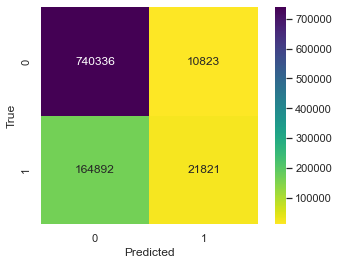

In [12]:
cb_predict_train = cb_model.predict(X_train)

acc_test = accuracy_score(y_train, cb_predict_train)
prec_test = precision_score(y_train, cb_predict_train)
rec_test = recall_score(y_train, cb_predict_train)
roc_auc_test = roc_auc_score(y_train, cb_model.predict_proba(X_train)[:, 1])
print(f'''Accuracy (train): {acc_test:.3f}
Precision (train): {prec_test:.3f}
Recall (train): {rec_test:.3f}
ROC_AUC (train): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_train, cb_predict_train)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

Accuracy (test): 0.805
Precision (test): 0.561
Recall (test): 0.097
ROC_AUC (test): 0.726 


Text(80.90000000000006, 0.5, 'True')

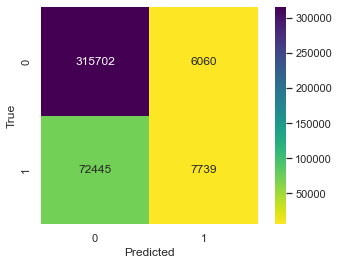

In [13]:
cb_predict = cb_model.predict(X_validation)
acc_test = accuracy_score(y_validation, cb_predict)
prec_test = precision_score(y_validation, cb_predict)
rec_test = recall_score(y_validation, cb_predict)
roc_auc_test = roc_auc_score(y_validation, cb_model.predict_proba(X_validation)[:, 1])

print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}
ROC_AUC (test): {roc_auc_test:.3f} ''')

cm = confusion_matrix(y_validation, cb_predict)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

In [36]:
#kfold = KFold(n_splits= num_folds, random_state=seed, shuffle=True)
#results_5 = cross_val_score(cat, X_train, y_train, cv = kfold, scoring= 'roc_auc')

#print(results_5.mean())
#print(results_5.std())

Learning rate set to 0.183021
0:	learn: 0.6058562	total: 83.5ms	remaining: 1m 23s
1:	learn: 0.5533962	total: 147ms	remaining: 1m 13s
2:	learn: 0.5200344	total: 220ms	remaining: 1m 13s
3:	learn: 0.4982515	total: 289ms	remaining: 1m 11s
4:	learn: 0.4836735	total: 363ms	remaining: 1m 12s
5:	learn: 0.4747813	total: 438ms	remaining: 1m 12s
6:	learn: 0.4684936	total: 498ms	remaining: 1m 10s
7:	learn: 0.4643285	total: 565ms	remaining: 1m 10s
8:	learn: 0.4611623	total: 638ms	remaining: 1m 10s
9:	learn: 0.4592432	total: 701ms	remaining: 1m 9s
10:	learn: 0.4577895	total: 774ms	remaining: 1m 9s
11:	learn: 0.4565801	total: 857ms	remaining: 1m 10s
12:	learn: 0.4557689	total: 935ms	remaining: 1m 10s
13:	learn: 0.4550306	total: 1s	remaining: 1m 10s
14:	learn: 0.4544946	total: 1.06s	remaining: 1m 9s
15:	learn: 0.4540767	total: 1.14s	remaining: 1m 9s
16:	learn: 0.4537212	total: 1.2s	remaining: 1m 9s
17:	learn: 0.4533567	total: 1.28s	remaining: 1m 9s
18:	learn: 0.4530743	total: 1.36s	remaining: 1m 10s
1

In [41]:
results_sum = [results_1, results_2, results_3, results_4, results_5]
names = ['LR', 'DT', 'RF', 'XG', 'CB']

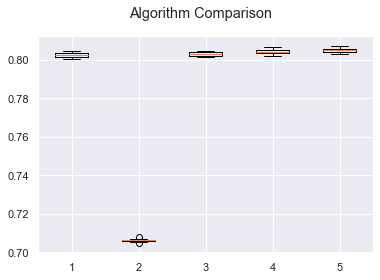

In [43]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
plt.boxplot(results_sum)
ax.set_xticklabels(names)
plt.show()

In [37]:
clf_model_save = pickle.dumps(clf_model)
dt_model_save = pickle.dumps(dt_model)
rf_model_save = pickle.dumps(rf_model)
xg_model_save = pickle.dumps(xg_model)
cb_model_save = pickle.dumps(cb_model)

[Text(0.5, 1.0, 'Top 10 Important features')]

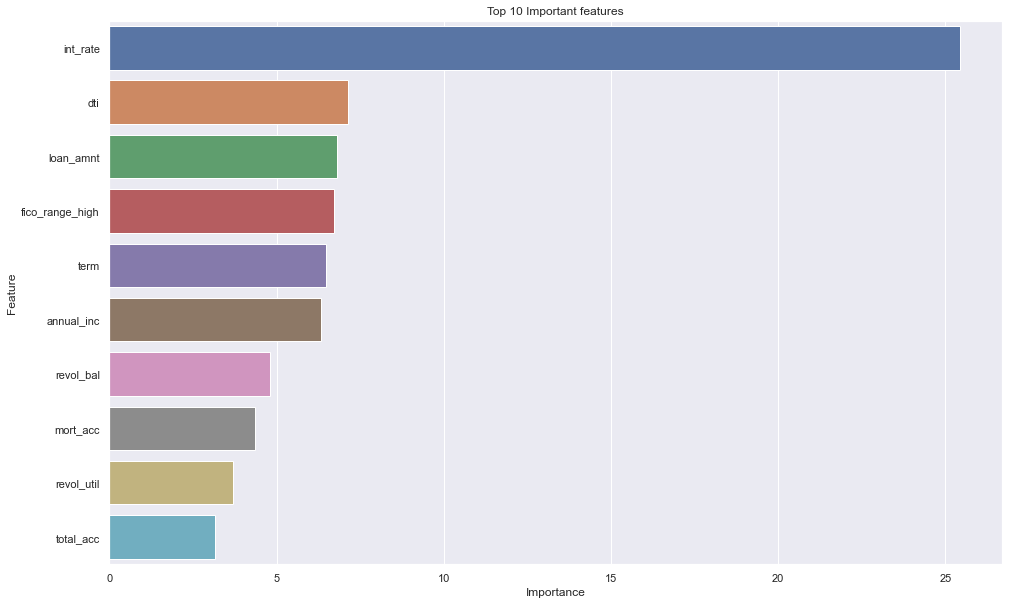

In [14]:
feat = cb_model.feature_names_
imp = cb_model.feature_importances_
imp_df = pd.DataFrame({'Feature': feat, 'Importance': imp})
imp_df = imp_df.sort_values('Importance', ascending=False)[:10]
fig, ax = plt.subplots(1,1, figsize= (16,10))
sns.barplot(x='Importance', y='Feature', data=imp_df).set(title='Top 10 Important features')

<AxesSubplot:>

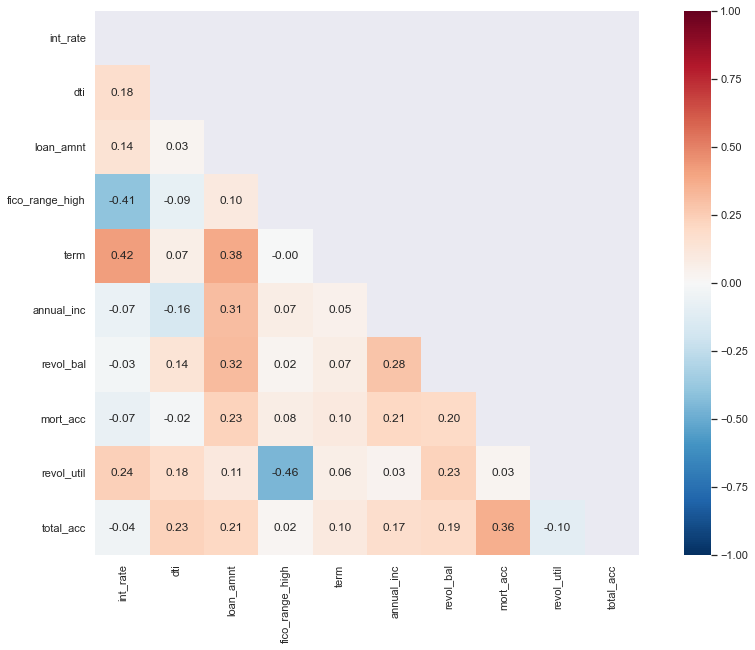

In [15]:
corr = X_train[imp_df['Feature'].values].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(1,1, figsize= (16,10))
sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', vmin=-1, vmax=1, annot=True, fmt='.2f')

In [19]:
from pickle import dump
from pickle import load
path = "C:\\Users\\ADMIN\\PycharmProjects\\LendingClub_Issued_Loans_Projects\\Save_model\\"
filename = path + 'Cb_model.sav'
dump(cb_model, open(filename,'wb'))

In [21]:
loaded_model = load(open(filename,'rb'))
result = loaded_model.score(X_validation,y_validation)
print(result)

0.804687694366905


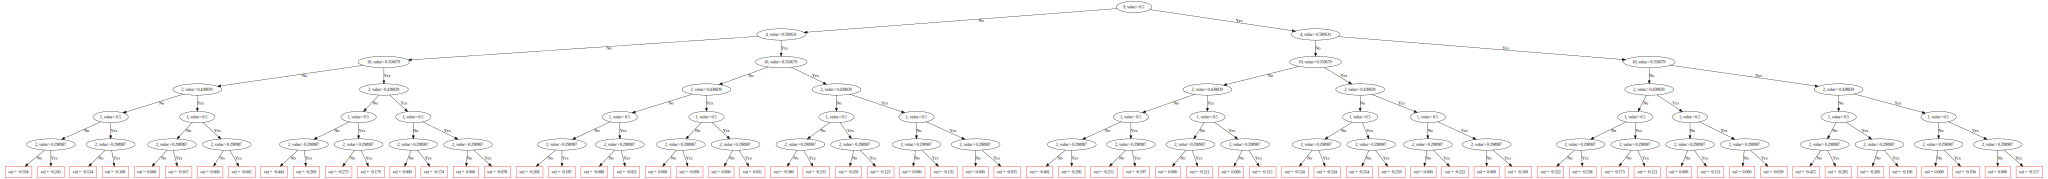

In [25]:
loaded_model.plot_tree(tree_idx= 0)

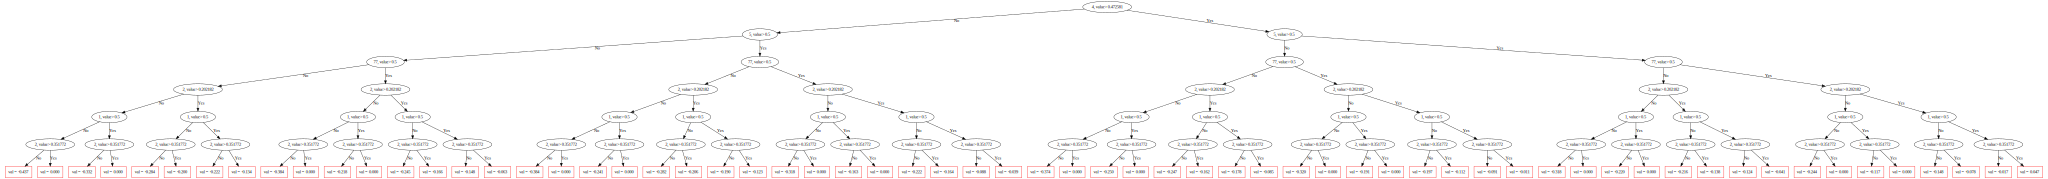

In [26]:
loaded_model.plot_tree(tree_idx= 1)